# Предварительный анализ данных

## Подключение библиотек

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from collections import Counter, OrderedDict

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

from IPython.display import Image

%matplotlib inline

## Загрузка данных

In [64]:
data = pd.read_excel('practice_dataframe.xlsx', usecols=['cat16_city', 'cat11_nationality', 'num1_5', 'num2_5', 'num3_5'])

### Вариант 4
Признаки для анализа:
- cat16_city
- cat11_nationality
- num1_5
- num2_5
- num3_5

## Обработка данных

In [65]:
data.head()

,cat11_nationality,cat16_city,num1_5,num2_5,num3_5
0,german,moscow,200.404132,374.849841,537.784
1,German,St. Petersburg,236.691176,757.925894,525.436
2,german,St. Petersburg,-26.114921,556.885394,572.672
3,German,Moscow,-82.764817,915.702660,570.468
4,german,Chelyabinsk,389.350889,595.813259,457.3


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat11_nationality  980 non-null    object 
 1   cat16_city         980 non-null    object 
 2   num1_5             1000 non-null   float64
 3   num2_5             951 non-null    float64
 4   num3_5             971 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [67]:
data.describe()

,num1_5,num2_5
count,1000.000000,951.000000
mean,-215.020836,477.456885
std,2304.593027,367.932609
min,-9999.000000,-680.684885
25%,-271.827089,253.822944
50%,233.072300,471.862930
75%,711.946661,695.402804
max,2777.457729,1637.450840


In [68]:
data.cat11_nationality.unique()

array(['german', 'German', 'French', '-', 'italian', nan, 'Italian', ' '],
      dtype=object)

In [69]:
data['cat11_nationality'] = data['cat11_nationality'].replace(
    {'german': 'German', 
     'italian': 'Italian', 
     '-': None, 
     ' ': None,
     np.nan: None}
)
data.cat11_nationality.unique()

array(['German', 'French', None, 'Italian'], dtype=object)

In [70]:
data.cat16_city.unique()

array(['moscow', 'St. Petersburg', 'Moscow', 'Chelyabinsk', 'novosibirsk',
       nan, '-', 'Novosibirsk', ' '], dtype=object)

In [71]:
data['cat16_city'] = data['cat16_city'].replace(
    {'moscow': 'Moscow', 
     'novosibirsk': 'Novosibirsk', 
     '-': None, 
     ' ': None,
     np.nan: None}
)
data.cat16_city.unique()

array(['Moscow', 'St. Petersburg', 'Chelyabinsk', 'Novosibirsk', None],
      dtype=object)

In [72]:
data['num3_5'] = data['num3_5'].replace(
    {'-': np.nan,
     ' ': np.nan}
)
data

,cat11_nationality,cat16_city,num1_5,num2_5,num3_5
0,German,Moscow,200.404132,374.849841,537.784087
1,German,St. Petersburg,236.691176,757.925894,525.436417
2,German,St. Petersburg,-26.114921,556.885394,572.672166
3,German,Moscow,-82.764817,915.702660,570.468156
4,German,Chelyabinsk,389.350889,595.813259,457.299999
...,...,...,...,...,...
995,French,Moscow,1120.816296,652.583299,NaN
996,German,Novosibirsk,-293.568986,334.198157,455.503513
997,German,Novosibirsk,402.936795,-36.892527,509.947684
998,German,Novosibirsk,-157.655030,165.774970,455.301733


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat11_nationality  941 non-null    object 
 1   cat16_city         942 non-null    object 
 2   num1_5             1000 non-null   float64
 3   num2_5             951 non-null    float64
 4   num3_5             912 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


## Визуальный анализ данных

Для качественных данных строятся столбчатая и круговая диаграммы.
Для количественных данных строятся гистограмма, оценка плотности распределения и диаграмма "ящик с усами".

### Категориальные признаки

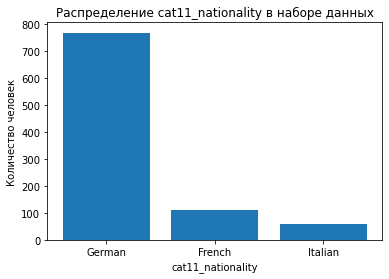

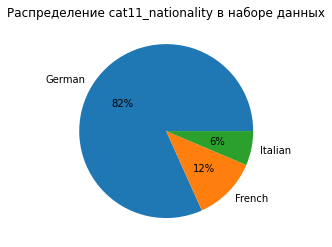

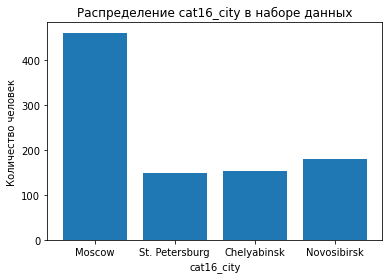

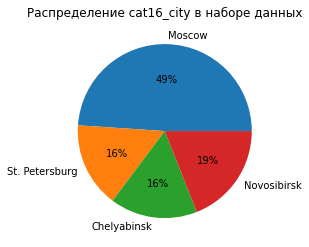

In [96]:
for column_name in data.iloc[:, 0:2]:
    # Столбчатая диаграмма
    counts = Counter(data[column_name].dropna())
    plt.bar(counts.keys(), counts.values())
    plt.title(f'Распределение {column_name} в наборе данных')
    plt.xlabel(column_name)
    plt.ylabel('Количество человек')
    plt.show()
    
    # Круговая диаграмма
    plt.pie(counts.values(), labels=counts.keys(), autopct='%1.0f%%')
    plt.title(f'Распределение {column_name} в наборе данных')
    plt.show()

### Количественные признаки

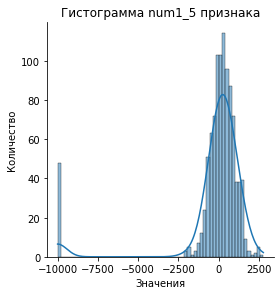

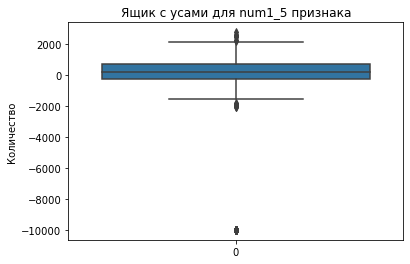

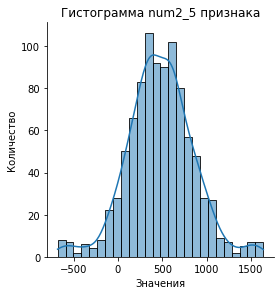

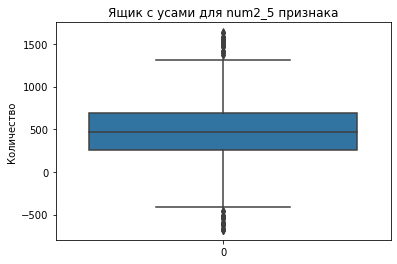

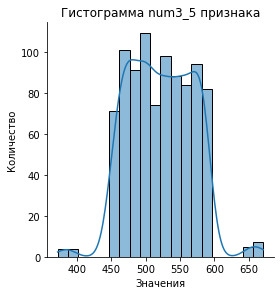

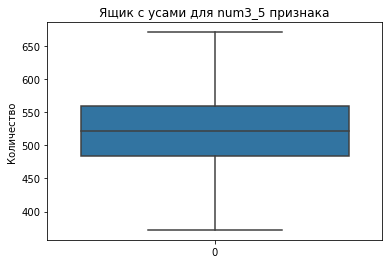

In [97]:
for column_name in data.iloc[:, 2:5]:
    # Гистограмма + kde
    sns.displot(data[column_name], kde=True, height=4)
    plt.title(f'Гистограмма {column_name} признака')
    plt.xlabel('Значения')
    plt.ylabel('Количество')
    plt.show()
    # Ящик с усами
    sns.boxplot(data=data[column_name])
    plt.title(f'Ящик с усами для {column_name} признака')
    plt.ylabel('Количество')
    plt.show()

## Поиск аномальных значений

## Преобразование данных

In [101]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data[['num1_5', 'num2_5', 'num3_5']])
data[['num1_5_scaled', 'num2_5_scaled', 'num3_5_scaled']] = scaled_values
data

,cat11_nationality,cat16_city,num1_5,num2_5,num3_5,num1_5_scaled,num2_5_scaled,num3_5_scaled
0,German,Moscow,200.404132,374.849841,537.784087,0.798297,0.455338,0.554085
1,German,St. Petersburg,236.691176,757.925894,525.436417,0.801137,0.620590,0.512769
2,German,St. Petersburg,-26.114921,556.885394,572.672166,0.780567,0.533864,0.670823
3,German,Moscow,-82.764817,915.702660,570.468156,0.776133,0.688651,0.663448
4,German,Chelyabinsk,389.350889,595.813259,457.299999,0.813085,0.550657,0.284778
...,...,...,...,...,...,...,...,...
995,French,Moscow,1120.816296,652.583299,NaN,0.870336,0.575147,NaN
996,German,Novosibirsk,-293.568986,334.198157,455.503513,0.759634,0.437801,0.278767
997,German,Novosibirsk,402.936795,-36.892527,509.947684,0.814149,0.277720,0.460942
998,German,Novosibirsk,-157.655030,165.774970,455.301733,0.770272,0.365147,0.278092


## Заполнение пропусков

Метод k ближайших соседей

In [105]:
copied_data = data.copy()
knn_imputer = KNNImputer()
transformed_data = knn_imputer.fit_transform(copied_data[['num1_5_scaled', 'num2_5_scaled', 'num3_5_scaled']])
data['num1_5_scaled'] = transformed_data[:, 0]